# 1. Data Introduction and Description 

The dataset contains 429,436 records of a comprehensive set of COVID-19 statistics, such as cases, fatalities, testing, vaccines, and other relevant indicators. 

# 2. Question of interest

“How are the COVID-19 cases related to the density of the population,healthcare industry and government intervention measures across the countries?”

# 3. Data Overview and EDA

* Source: https://ourworldindata.org/explorers/covid
* Total Rows: 429,436
* Total Columns: 67
* Target Variable: total_cases

#### Key Features: 

* Location: The country or region's name
* population_density: The number of persons per square kilometer; larger numbers may result in greater viral spread.
* total_cases: Total COVID-19 cases confirmed, indicating the total level of infection.
* new_cases: COVID-19 cases that have recently been recorded
* hospital_beds_per_thousand: hospital bed availability, which impacts the ability to provide healthcare.
* icu_patients_per_million: ICU cases per million, indicating a significant caseload.
* hosp_patients_per_million: Hospitalized cases per million, indicating the strain on healthcare systems.
* stringency_index: Government regulations in limiting the spread of COVID-19.
* gdp_per_capita: Economic power, which could affect the standard of healthcare.
* life_expectancy: A measure of quality of healthcare and population health resiliency.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
file_path = "C:/Users/katta/Downloads/owid-covid-data (1).csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%       

# 3a. Data Visualization and Trends

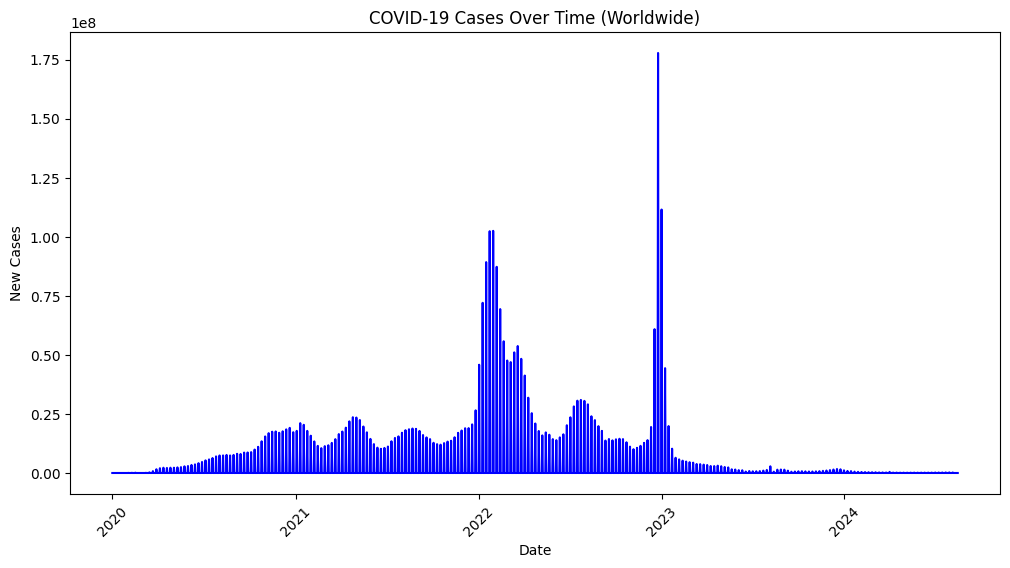

In [7]:
#1 Covid-19 cases over time
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby('date')['new_cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, color='blue')
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases Over Time (Worldwide)")
plt.xticks(rotation=45)
plt.show()


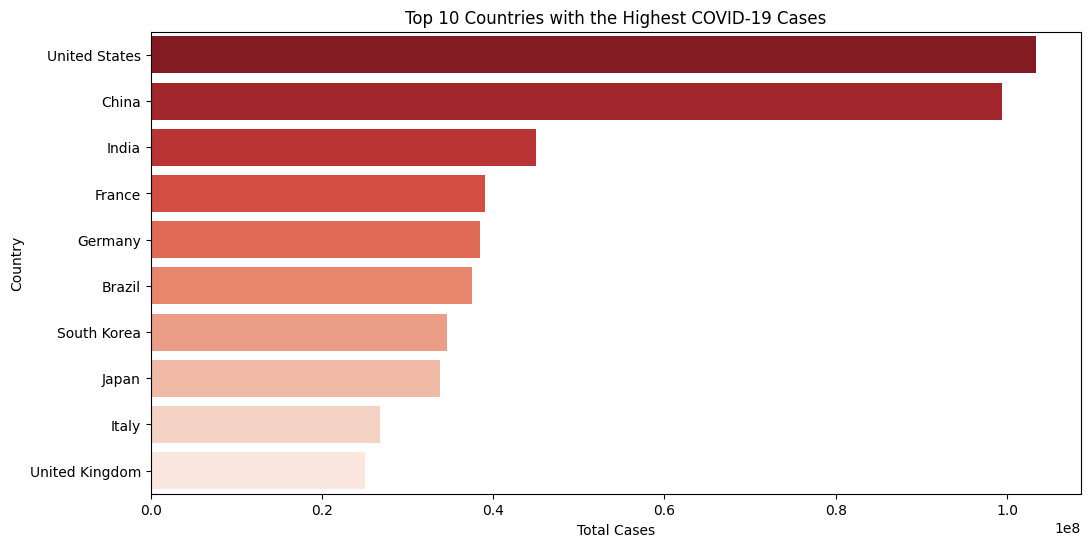

In [8]:
#Selecting only countries into df_filtered
df_filtered = df[~df['location'].isin(['European Union (27)','Asia','Europe','North America','South America','World', 'Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries', 'Western Sahara', 'High-income countries'])]

#2 Top 10 countries with highest cases
top_countries = df_filtered.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest COVID-19 Cases")
plt.show()



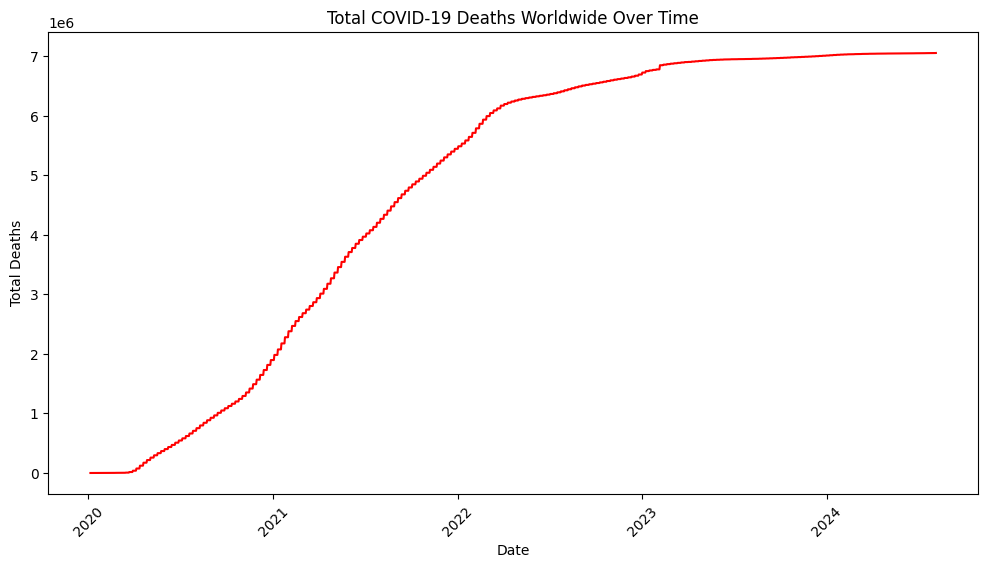

In [9]:
# Group by date and calculate the total deaths over time
df_total_deaths = df.groupby('date')['total_deaths'].max()

plt.figure(figsize=(12, 6))
plt.plot(df_total_deaths.index, df_total_deaths.values, color='red')
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths Worldwide Over Time")
plt.xticks(rotation=45)
plt.show()


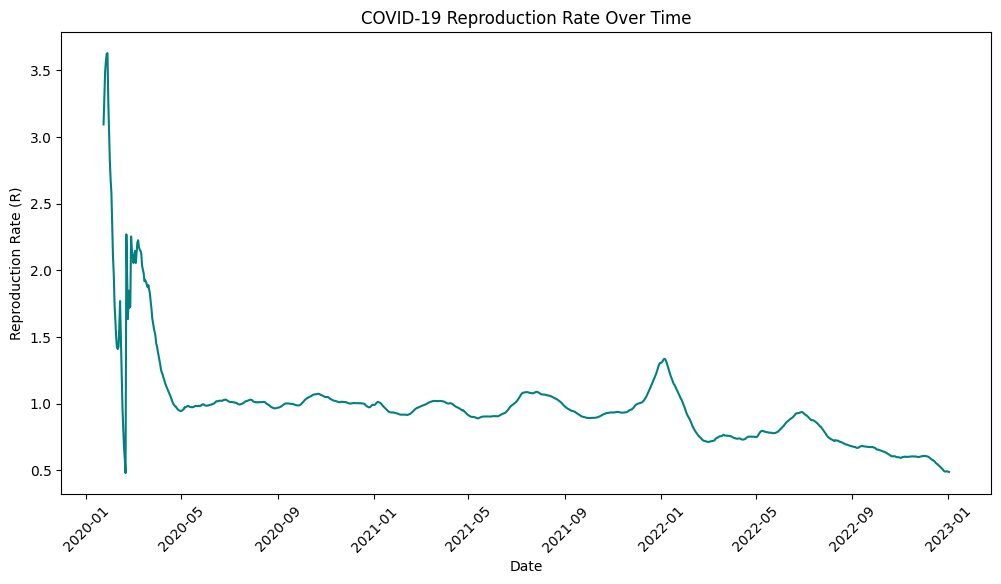

In [10]:
# Plotting the COVID-19 reproduction rate (R) over time
df_reproduction_rate = df.groupby('date')['reproduction_rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_reproduction_rate.index, df_reproduction_rate.values, color='teal')
plt.xlabel("Date")
plt.ylabel("Reproduction Rate (R)")
plt.title("COVID-19 Reproduction Rate Over Time")
plt.xticks(rotation=45)
plt.show()


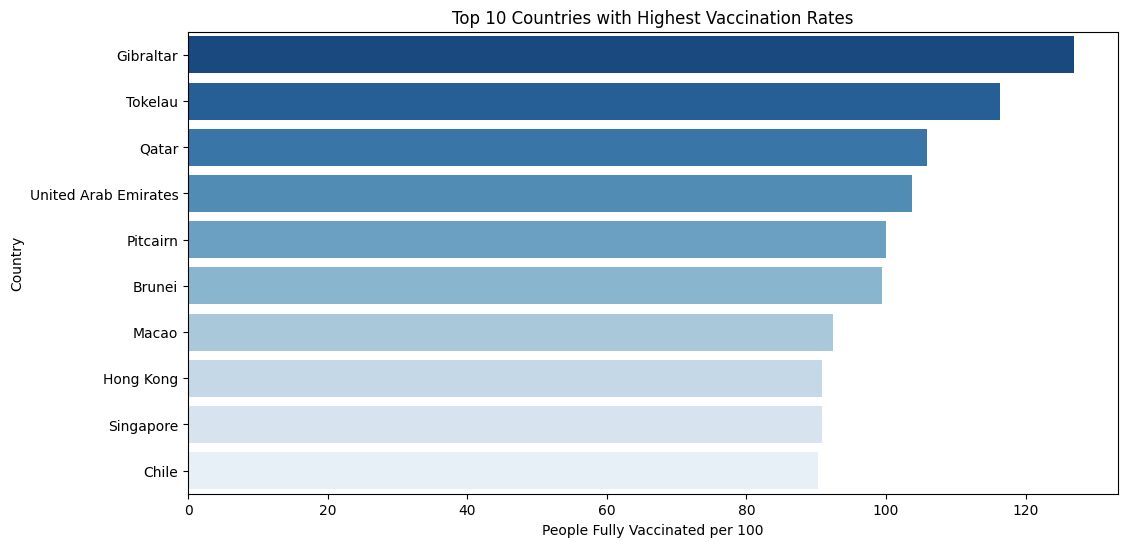

In [11]:
vaccination_rate = df.groupby("location")["people_fully_vaccinated_per_hundred"].max().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=vaccination_rate.values, y=vaccination_rate.index, palette="Blues_r")
plt.xlabel("People Fully Vaccinated per 100")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Vaccination Rates")
plt.show()


# 4. Data Preparation

In [12]:
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                          int64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['iso_code'] = encoder.fit_transform(df['iso_code'])
df['continent'] = encoder.fit_transform(df['continent'])
df['location'] = encoder.fit_transform(df['location'])
df['tests_units'] = encoder.fit_transform(df['tests_units'])

df['date'] = pd.to_datetime(df['date'])
print(min(df['date']),max(df['date']))
print((max(df['date'])-min(df['date'])).days)
min_date = min(df['date'])
df['date'] = (df['date']- min_date).dt.days


2020-01-01 00:00:00 2024-08-14 00:00:00
1687


In [14]:
#Dealing with the missing values

print(df.isna().sum().sum())
df_filled = df.fillna(0)
df_filled.isna().sum().sum()

14237766


0

# 5. Model Construction

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selected features
selected_features = ['population_density', 'hospital_beds_per_thousand', 'icu_patients_per_million', 
                     'stringency_index', 'gdp_per_capita', 'life_expectancy']

X = df_filled[selected_features]
y = df_filled['total_cases']  # Target variable : total_cases

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

# Evaluating Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression:")
print(f"MSE: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

# Model 2: Random Forest Regression

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression:")
print(f"MSE: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Model 3: K-Nearest Neighbors Regression (KNN)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluating the KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Regression (KNN):")
print(f"MSE: {mse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")

# Model 4: Decision Tree Regression (Tuned)

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters for the Decision Tree:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluating the Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nTuned Decision Tree Regression:")
print(f"MSE: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")


Linear Regression:
MSE: 1794269941534991.25
R-squared: 0.06

Random Forest Regression:
MSE: 1040908881928688.62
R-squared: 0.46

K-Nearest Neighbors Regression (KNN):
MSE: 1164777616842975.75
R-squared: 0.39
Best parameters for the Decision Tree: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Tuned Decision Tree Regression:
MSE: 1040886350766581.00
R-squared: 0.46


# 6. Model Selection and Validation

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=None, random_state=42)
}

# Cross-validation results
cv_results = {}

# Performing cross-validation to get more reliable or accurate estimates of model performance
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -cv_scores.mean()  # Convert negative MSE to positive
    cv_results[model_name] = mean_cv_mse
    print(f"\n{model_name} Cross-validation MSE: {mean_cv_mse:.2f}")


best_model_name = "Decision Tree" 

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_model = best_model.predict(X_test)

# EvaluatING the model
mse_best_model = mean_squared_error(y_test, y_pred_best_model)
r2_best_model = r2_score(y_test, y_pred_best_model)

print(f"\nBest Model: {best_model_name}")
print(f"Test Set MSE: {mse_best_model:.2f}")
print(f"Test Set R-squared: {r2_best_model:.2f}")



Linear Regression Cross-validation MSE: 1876420736735817.50

Random Forest Cross-validation MSE: 2766087723272411.00

KNN Cross-validation MSE: 2643175824512262.50

Decision Tree Cross-validation MSE: 2590402472392161.50

Best Model: Decision Tree
Test Set MSE: 1040886350766581.00
Test Set R-squared: 0.46


# Observations on the models

We compared Linear Regression, Random Forest, K-Nearest Neighbors (KNN) and Decision Tree Regressor and from that Decision Tree Regressor was found to be the best to predict COVID-19 cases. In cross validation, Linear Regression had the least MSE, but on real-world test data, it didn’t fare well. The reason why we have Linear Regression here is that its basically just a straight line relationship with your target and your features where, this assumption is not right for the case of COVID 19 because we cannot assume that our cases are a direct effect of only 1 or 2 features, these cases are affected by many factors that are highly complex. We discovered that when applied to the test dataset, the Linear Regression model had a fairly low R-squared value (0.06) implying the model couldn’t capture the complexity is the complex relationships in the data.

On the contrary, if the Decision Tree model performed a much better job of capturing the complexities of the non-linear relationship in the data. It splits the data into decision rules depending on different features so that it better handles interaction of features. The Decision Tree, though overfitting (repeating some values), performed much better on the test data (R-squared of 0.46). There are a couple of reasons why it’s a good choice: it can explain how things like population density, healthcare and government regulation affect COVID-19 cases.

The Random Forest and KNN models were decent, but the Decision Tree did much better. An ensemble method is one in which multiple decision trees are combined together, such as Random Forest; however, the performance of Random Forest was ever so slightly lower than Decision Tree again, especially with regards to cross validation. KNN model too had its limitations, it had trouble dealing with larger datasets and needed more fine tuning to work well. Finally, for the best performance for predicting COVID-19 cases, the Decision Tree model is the best choice, as it strikes a good balance between performance, ease of understanding, and being able to capture complex relationships.

# 7. Prediction on New Testing Data

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

new_data = pd.DataFrame({
    'population_density': [500, 2000, 150],  # Example new data
    'hospital_beds_per_thousand': [3.5, 2.0, 4.5],
    'icu_patients_per_million': [100, 500, 300],
    'stringency_index': [45, 70, 25],
    'gdp_per_capita': [40000, 15000, 20000],
    'life_expectancy': [80, 75, 65]
})

# Ensuring that we are selecting the same features as used during model training
selected_features = ['population_density', 'hospital_beds_per_thousand', 'icu_patients_per_million', 
                     'stringency_index', 'gdp_per_capita', 'life_expectancy']

new_data = new_data[selected_features]
new_data_scaled = scaler.transform(new_data)

# Predicting using the best model (Decision Tree in this case)
new_predictions = best_dt_model.predict(new_data_scaled)

# Adding the predictions to the new data
new_data['predicted_total_cases'] = new_predictions

# Output of the predictions
print("\nPredictions on New Data:")
print(new_data[['predicted_total_cases']])




Predictions on New Data:
   predicted_total_cases
0             13538779.0
1                42339.7
2              8835152.0


Predictions on the new data indicate that the case count of the first country could be more than 13.5 million total COVID 19 cases with a likely heavy impact, potentially emanating from the high population density and/or limited healthcare resources. The second country is only expected to have just over 42,340 total cases, signifying better virus control, perhaps thanks to implentation of strong government measures, less population density, or stronger healthcare systems. With somewhere in between the spread and the efforts to curtail the spread, the third country was predicted to end up with around 8.8 million cases. With this, we can see how each country will be affected by different factors such as population, different government actions, and healthcare, on the amount of COVID-19 cases that each country will have. Nevertheless they should be understood in regards to these factors.

# 8. Conclusion

1. Linear Regression:
Second one is to simply utilize a Linear Regression, which is basically a simple model that searches for a straight line relationship between the features and the target (COVID-19 cases). However, it worked well in cross validation producing a lowest error (MSE = 1.88e+15), which translates into being able to predict reasonably well on the training data. However, I tested it on real data (test set) and it does not perform very well (that is, low R-squared of 0.06). In other words, Linear Regression didn’t work well because Linear Regression couldn’t handle the complexities of data, and when it wasn’t simple or linear.

2. Random Forest:
The other more advanced model is called Random Forest, it uses several decision trees to increase the accuracy. Although, it is good at handling complex data it had a higher error (MSE = 2.77e+15)than the Decision Tree. However, Random Forest can work with big datasets, it can fit non linear patterns and it’s a strong model, but it was not the best at generalizing and was harder to interpret, so it not very useful for our project.

3. K-Nearest Neighbors (KNN):
Another model is KNN that predicts by exploring the nearest data points. It is understandable but didn't perform very well (MSE = 2.64e+15) in this project. KNN is slow with large datasets and is sensitive to scaling of the data. Since it faced a lack of clarity around the COVID data, it didn’t perform as good as Decision Trees or Random Forests.

4. Decision Tree:
Overall, the Decision Tree model worked the best with good accuracy and a good level of interpretability. When cross validating it showed MSE of 2.59e+15 and R-squared of 0.46 in test data. That is it modeled the complex relationships in the data better than Linear Regression. However there was slight overfitting (the model predicted the same value a lot) but the results were the best and it worked great to predict COVID-19 cases.

Overall Conclusion:
Why did we choose Decision Tree over other linear regression?
Although Linear Regression performed the best in cross-validation (the lowest error), it clearly did not perform as well on the real-world error (test set), as indicated by its R-squared value of 0.06. This implies that it couldn’t get its head around the intricacies in the data — non linear relationships between features (like population density, healthcare resources etc.) and government actions.

On the other side, the Decision Tree was able to capture these complex patterns better and it also performed quite well in the test data with the R squared of 0.46. While it had a little overfitting, the model was still the best because it had the ability to account for the complexities in the COVID-19 dataset and made correct predictions.

Lastly, Decision Tree proved to be the best model as it was able to capture the patterns in both cross validation and in actual data and did well with both. Linear Regression worked for simpler problems, but it was not able to predict COVID-19 cases in a very accurate way owing to complexity of relationships in the data. With that being said, the Decision Tree was the best balance of accuracy and simplicity for this task.